In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')
import numpy as np



In [8]:
df = pd.read_csv('mall customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.shape

(200, 5)

In [10]:
df.drop(['CustomerID','Gender'], axis=1, inplace=True)

In [11]:
df.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [12]:

df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [13]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [14]:
df.shape

(200, 3)

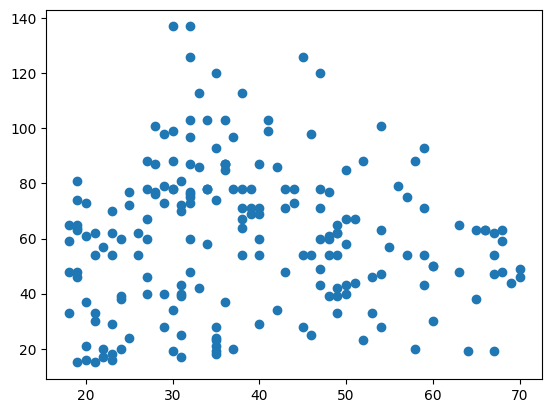

In [15]:
plt.scatter(df.age, df.income)
plt.show()

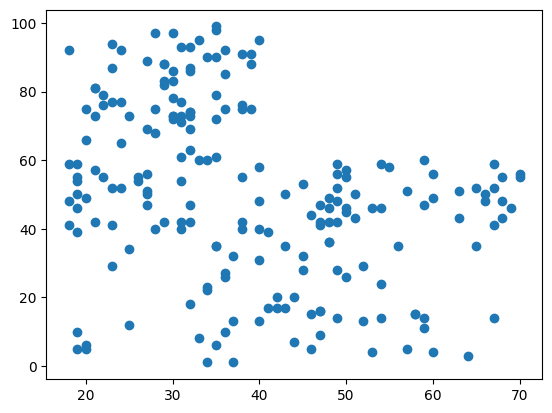

In [16]:
plt.scatter(df.age, df.score)
plt.show()

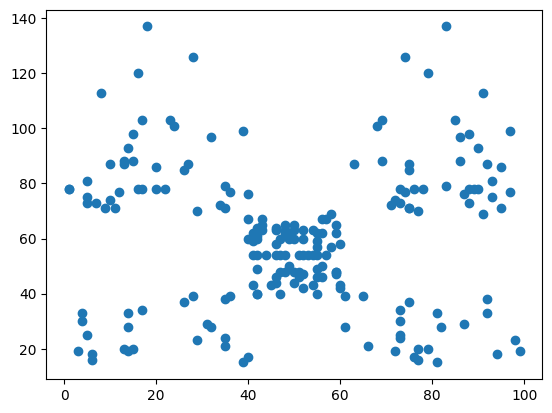

In [17]:
plt.scatter(df.score, df.income)
plt.show()


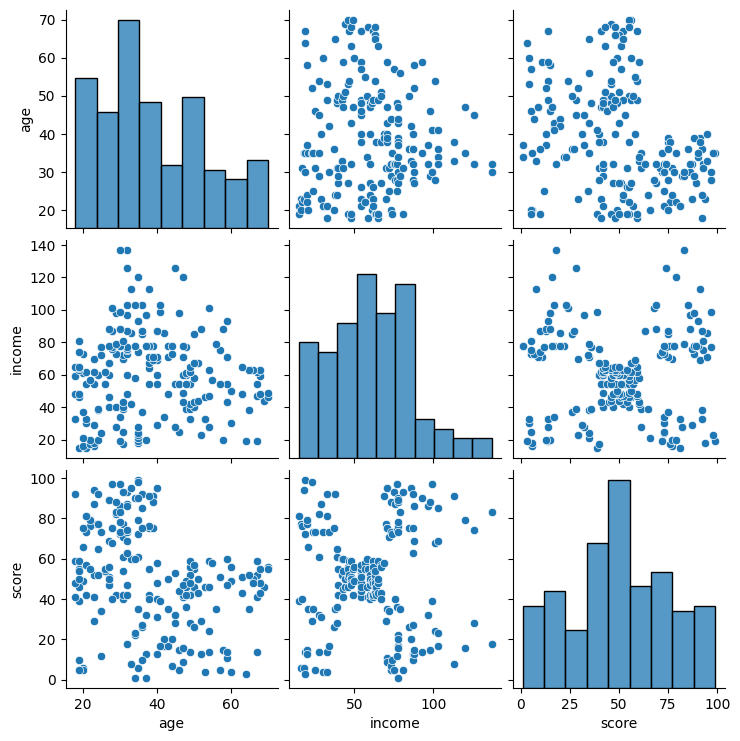

In [18]:
sns.pairplot(df[['age','income','score']])
plt.savefig('image.png')

## K-Means Clustering


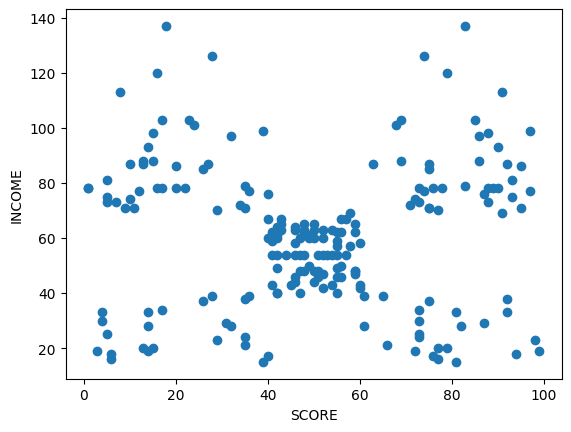

In [20]:
plt.scatter(df.score, df.income) 
plt.xlabel('SCORE')
plt.ylabel('INCOME')
plt.show()

In [21]:
from sklearn.cluster import KMeans
km1 = KMeans() 

In [22]:
km1.fit_predict(df[['income', 'score']])

array([1, 6, 1, 6, 1, 6, 1, 4, 1, 6, 1, 4, 1, 6, 1, 6, 1, 6, 1, 4, 1, 6,
       1, 6, 1, 6, 1, 6, 1, 4, 1, 6, 1, 4, 1, 6, 1, 6, 1, 6, 1, 4, 1, 6,
       1, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 7, 5, 7, 5, 7, 5,
       7, 5], dtype=int32)

In [23]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [24]:
df['km1_cluster'] = km1.fit_predict(df[['income', 'score']])
df.head()

,age,income,score,km1_cluster
0,19,15,39,5
1,21,15,81,7
2,20,16,6,5
3,23,16,77,7
4,31,17,40,5


In [25]:
km1.predict([[20, 37]])

array([5], dtype=int32)

In [26]:
km1.cluster_centers_

array([[108.18181818,  82.72727273],
       [ 63.72093023,  46.1627907 ],
       [ 89.40625   ,  15.59375   ],
       [ 26.66666667,  93.66666667],
       [ 47.51162791,  51.79069767],
       [ 25.72727273,  20.22727273],
       [ 78.03571429,  81.89285714],
       [ 24.46666667,  74.6       ]])

In [27]:
df8 = df[df.km1_cluster==7]
df8

,age,income,score,km1_cluster
1,21,15,81,7
3,23,16,77,7
5,22,17,76,7
9,30,19,72,7
13,24,20,77,7
15,22,20,79,7
17,20,21,66,7
21,25,24,73,7
23,31,25,73,7
25,29,28,82,7


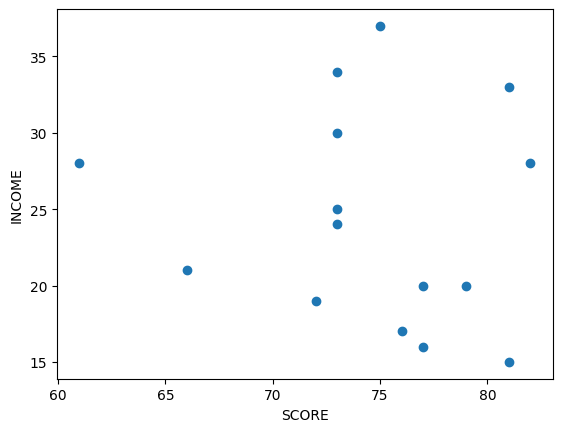

In [28]:
plt.scatter(df8.score, df8.income) 
plt.xlabel('SCORE')
plt.ylabel('INCOME')
plt.show()

In [29]:
df1 = df[df.km1_cluster==0]
df2 = df[df.km1_cluster==1]
df3 = df[df.km1_cluster==2]
df4 = df[df.km1_cluster==3]
df5 = df[df.km1_cluster==4]
df6 = df[df.km1_cluster==5]
df7 = df[df.km1_cluster==6]

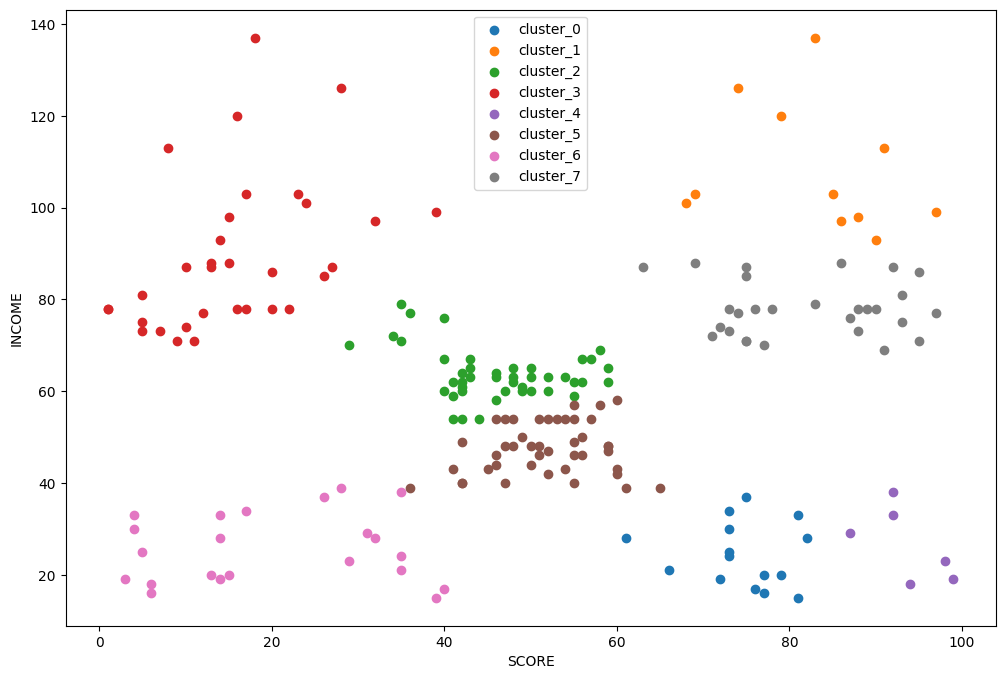

In [30]:
plt.figure(figsize=(12,8))

plt.scatter(df8.score, df8.income, label='cluster_0') 
plt.scatter(df1.score, df1.income, label='cluster_1') 
plt.scatter(df2.score, df2.income,  label='cluster_2') 
plt.scatter(df3.score, df3.income, label='cluster_3')
plt.scatter(df4.score, df4.income, label='cluster_4') 
plt.scatter(df5.score, df5.income, label='cluster_5') 
plt.scatter(df6.score, df6.income, label='cluster_6') 
plt.scatter(df7.score, df7.income, label='cluster_7') 

plt.legend()
plt.xlabel('SCORE')
plt.ylabel('INCOME')
plt.show()

#Within-Cluster Sum of Squares (WCSS): How many clusters are good enough?

In [31]:
wcss = []

for i in range(1,15):
    km2 = KMeans(n_clusters=i)
    km2.fit(df[['income', 'score']])
    wcss.append(km2.inertia_)

In [32]:
wcss


[269981.28,
 183714.08082173267,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 37442.24745037571,
 32233.42255063777,
 30666.262130982122,
 24484.399095719098,
 22985.736191749427,
 19206.801211200145,
 17319.071495171498,
 16217.17980646804,
 14364.860441388679]

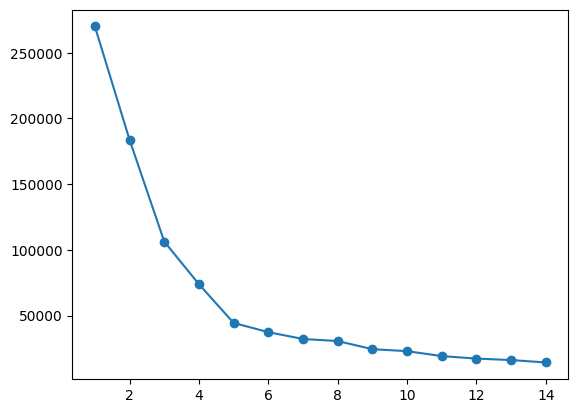

In [33]:
plt.plot(range(1,15), wcss, marker='o')

In [34]:
from kneed import KneeLocator

In [35]:
kne = KneeLocator(range(1,15), wcss, curve='convex', direction='decreasing')

In [36]:
kne

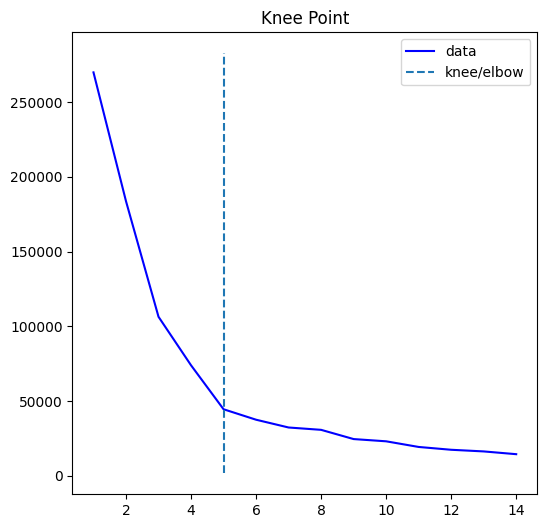

In [37]:
kne.plot_knee()

In [38]:
kne.knee

np.int64(5)

In [40]:
km3 = KMeans(n_clusters=5)

In [41]:
df['km1_cluster'] = km3.fit_predict(df[['income', 'score']])
df.head()

,age,income,score,km1_cluster
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0


In [42]:
km3.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

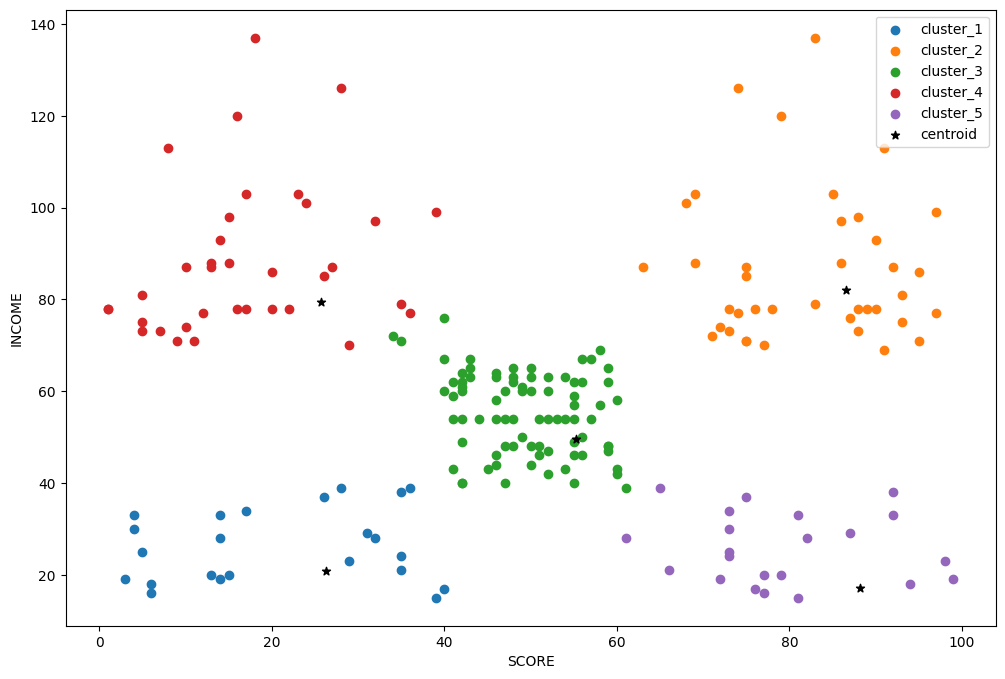

In [43]:
df1 = df[df.km1_cluster==0]
df2 = df[df.km1_cluster==1]
df3 = df[df.km1_cluster==2]
df4 = df[df.km1_cluster==3]
df5 = df[df.km1_cluster==4]

plt.figure(figsize=(12,8))
 
plt.scatter(df1.score, df1.income, label='cluster_1') 
plt.scatter(df2.score, df2.income,  label='cluster_2') 
plt.scatter(df3.score, df3.income, label='cluster_3')
plt.scatter(df4.score, df4.income, label='cluster_4') 
plt.scatter(df5.score, df5.income, label='cluster_5') 

plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], label='centroid', color='black', marker='*')

plt.legend()
plt.xlabel('SCORE')
plt.ylabel('INCOME')
plt.show()